


# Project: No Show appointments dataset investigation.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I'll analyze a dataset about no show up appointment. And I'll answer thest questions: 
Which age is most likely to not showing?
Which neighbourhoods were most likely not showing?
Do any other factors affect not showing? 

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
df=pd.read_csv(r'C:\Users\huawei\Downloads\noshow_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [115]:
df.shape

(110527, 14)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [117]:
#check for missing data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [118]:
#check for duplicated data
sum(df.duplicated())

0



### Data Cleaning (Replace this with more specific notes!)

In [119]:
#drop unnecessary columns
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

In [120]:
#change datatype for some columns
df['ScheduledDay'] = df['ScheduledDay'].astype('datetime64')
df['AppointmentDay'] = df['AppointmentDay'].astype('datetime64')

In [121]:
#rename no-show column
df.rename(columns = {'No-show' : 'no_show'}, inplace = True)
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [122]:
#convert no show column to numeric column and assign it
df.no_show[df['no_show'] == 'No'] = 0
df.no_show[df['no_show'] == 'Yes'] = 1

showed_up = df['no_show'] == 0
not_showed = df['no_show'] == 1
df['showed_up'] = showed_up
df['not_showed'] = not_showed

<ipython-input-122-109a76960ba2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.no_show[df['no_show'] == 'No'] = 0
<ipython-input-122-109a76960ba2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.no_show[df['no_show'] == 'Yes'] = 1


In [123]:
#check uniqueness
print('Gender',(df.Gender.unique()))
print('Age',sorted(df.Age.unique()))
print('Scholarship',(df.Scholarship.unique()))
print('SMS_received',(df.SMS_received.unique()))
print('no_show',(df.no_show.unique()))
print('Hipertension',(df.Hipertension.unique()))
print('Diabetes',(df.Diabetes.unique()))
print('Alcoholism',(df.Alcoholism.unique()))

Gender ['F' 'M']
Age [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Scholarship [0 1]
SMS_received [0 1]
no_show [0 1]
Hipertension [1 0]
Diabetes [0 1]
Alcoholism [0 1]


In [124]:
#remove the incorrect data
df.drop(df.index[df['Age'] <= 0], inplace = True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          106987 non-null  object        
 1   ScheduledDay    106987 non-null  datetime64[ns]
 2   AppointmentDay  106987 non-null  datetime64[ns]
 3   Age             106987 non-null  int64         
 4   Neighbourhood   106987 non-null  object        
 5   Scholarship     106987 non-null  int64         
 6   Hipertension    106987 non-null  int64         
 7   Diabetes        106987 non-null  int64         
 8   Alcoholism      106987 non-null  int64         
 9   Handcap         106987 non-null  int64         
 10  SMS_received    106987 non-null  int64         
 11  no_show         106987 non-null  object        
 12  showed_up       106987 non-null  bool          
 13  not_showed      106987 non-null  bool          
dtypes: bool(2), datetime64[ns](2), int64

In [126]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Which age is most likely to not showing?)

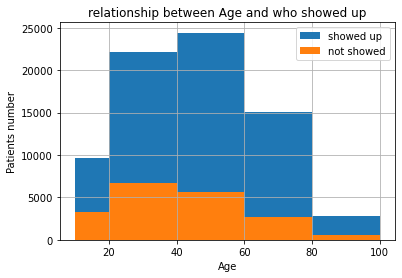

In [127]:
# a histogram to show the relationship between age and showing up

df.Age[showed_up].hist(bins= [10, 20, 40, 60, 80, 100], label = 'showed up')
df.Age[not_showed].hist(bins= [10, 20, 40, 60, 80, 100], label = 'not showed')
plt.xlabel('Age')
plt.ylabel('Patients number')
plt.title('relationship between Age and who showed up')
plt.legend();

> it showed that 20-40 years are the most who missed an appointment.

### Research Question 2  (Which neighbourhoods were most likely not showing?)

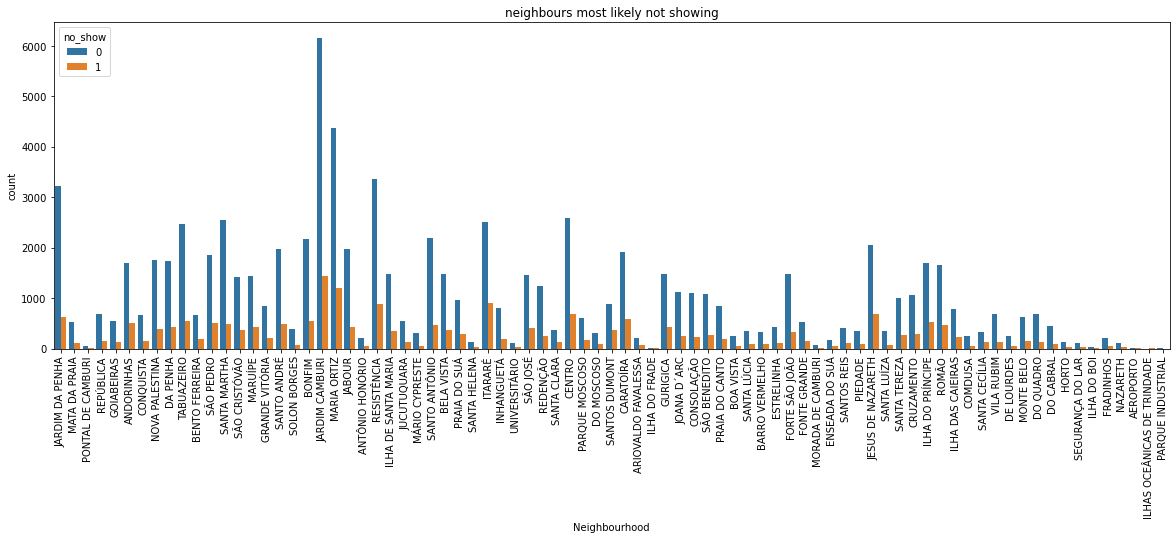

In [128]:
# a clusterd chart to show the neighbourhoods and not showing

plt.figure(figsize=(20,6))
plt.title('neighbours most likely not showing')
plt.xticks(rotation=90)
sns.countplot(x=df['Neighbourhood'], data=df, hue='no_show');

> we can see most of appointments come from Jardim Camburi and Maria Ortiz neighbourhoods.

### Research Question 3  (Do any other factors affect not showing?)

In [129]:
# def function to plot a bar chart 

def chart(val1,val2):
    fig = plt.figure(figsize=(15, 15))
    df.groupby([val1, val2])[val1].count().unstack(val2).plot(kind='bar', stacked=True)

Text(0.5, 1.0, 'relationship between Hipertension and showing')

<Figure size 1080x1080 with 0 Axes>

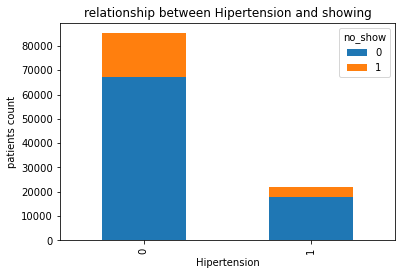

In [130]:
# a chart showing relationship between Hipertension and showing up using def function

chart("Hipertension","no_show")
plt.ylabel("patients count")
plt.title("relationship between Hipertension and showing")

> here it seems that Hipertension not have a big affect on not showing up.

<Figure size 1080x1080 with 0 Axes>

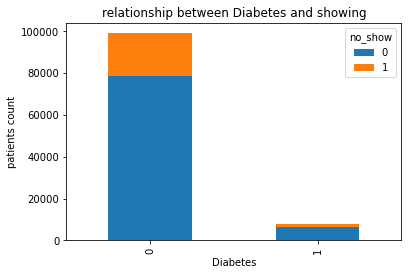

In [131]:
# a chart showing relationship between Diabetes and showing up using def function

chart("Diabetes", "no_show")
plt.ylabel("patients count")
plt.title("relationship between Diabetes and showing");

> here it seems that Diabetes not have a big afeect on not showing up.

<Figure size 1080x1080 with 0 Axes>

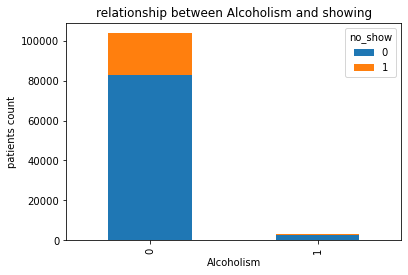

In [132]:
# a chart showing relationship between Alcoholism and showing up using def function

chart("Alcoholism", "no_show")
plt.ylabel("patients count")
plt.title("relationship between Alcoholism and showing");

> Also here it seems that Alcoholism not have a big afeect on not showing up.

<Figure size 1080x1080 with 0 Axes>

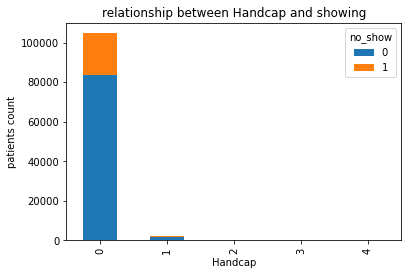

In [133]:
# a chart showing relationship between Handicap and showing up using def function

chart("Handcap", "no_show")
plt.ylabel("patients count")
plt.title("relationship between Handcap and showing");

> it seems that Handicap not have a big afeect on showing up.

<a id='conclusions'></a>
## Conclusions

> after analyzing and visualizing, I come up with some conclusions.

>the age between 20-40 years might miss the appointment and age between 40-60 years are most shown up th the appointment.

> in the second visual it represents the Jardim Camburi neighbourhood residents are the most in showing and not showing up.

> for the other factors we can say that Hipertension not a big consider for showing or not if they have it or not i most likely they will show up.

> Also the Diabets the same. We can see who have it most likely to show up. The same for Alcoholism and Handicap



> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

## Limitations

> 1. most of the variables are categorical.
> 2. don't contain alot of details.